In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pandas as pd  # Pandas, the wizard of data manipulation and analysis.
import numpy as np  # NumPy, the numerical powerhouse for handling arrays like a pro.
import re  # Regular expressions, the magic wand for text pattern matching.
import string  # A gateway to every letter, digit, and punctuation you can think of.
import matplotlib.pyplot as plt  # Your artistic assistant for crafting beautiful plots.
import seaborn as sns  # The style guru for elegant statistical data visualizations.
import tensorflow as tf  # TensorFlow, your deep learning companion for tackling big challenges.
import joblib  # The memory saver for serializing and deserializing Python objects.

from sklearn.feature_extraction.text import TfidfVectorizer  # The alchemist for transforming text into weighted numerical vectors.
from sklearn.model_selection import train_test_split  # Your splitter, dividing data into training and testing realms.
from sklearn.preprocessing import LabelEncoder  # A translator for encoding categorical labels into numbers.
from sklearn.linear_model import LogisticRegression  # Logistic Regression, the go-to for simple yet effective classification.
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes, a probabilistic sage for text data.
from sklearn.svm import SVC  # Support Vector Classifier, a boundary-defining champion.
from sklearn.ensemble import RandomForestClassifier  # Random Forest, the tree-loving collective genius for classification tasks.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # The judges of model performance, providing detailed verdicts.

from tensorflow.keras.preprocessing.text import Tokenizer  # The vocabulary architect for transforming text into tokenized wonders.
from tensorflow.keras.preprocessing.sequence import pad_sequences  # The text equalizer, padding sequences to a common length.
from tensorflow.keras.models import Sequential  # The sequential storyteller for building neural networks layer by layer.
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D  # The building blocks of modern neural networks:
    # Embedding: The word magician, mapping words into dense vector spaces.
    # LSTM: The memory keeper, capable of handling sequential data with flair.
    # Dense: The all-purpose neuron for fully connected layers.
    # SpatialDropout1D: A regularization artist for reducing overfitting in text data.


In [13]:
df = pd.read_csv('/kaggle/input/sentiment-dataset/ai_ASSESSMENT-DATASET.csv')  
# Summoning the dataset into existence, bringing raw insights from its CSV cocoon.


In [14]:
# Function for Text Preprocessing
def clean_text(text):  # A function to give raw text a polished, refined appearance.
    if not isinstance(text, str):  # Checking if the input is text; if not, we return a blank slate.
        return ""
    text = text.lower()  # Transforming all letters to lowercase, leveling the playing field.
    text = re.sub(r'http\S+', '', text)  # Curling out the URLs, banishing pesky links from our text.
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Sweeping away special characters and numbers, leaving only letters and spaces.
    text = text.strip()  # Trimming excess whitespace to keep things neat and tidy.
    return text  # Returning the pristine, polished text.

df["Cleaned Review"] = df["Review"].apply(clean_text)  # Applying the cleaning magic to every review in the dataset.


In [15]:
# Analyze Class Distribution
print("Class Distribution:")  # Let's see how the sentiments are spread.
print(df["Sentiment"].value_counts())  # Count and display the number of each sentiment class.


Class Distribution:
Sentiment
Positive    26000
Negative    15458
Neutral      8157
Name: count, dtype: int64


In [16]:
# Sentiment Encoding
le = LabelEncoder()  # Creating a label encoder to transform sentiments into numbers.
y = le.fit_transform(df["Sentiment"])  # Converting sentiment labels into numeric values for modeling.


In [17]:
# Vectorization (TF-IDF)

# Increased max features for better text representation
tfidf = TfidfVectorizer(max_features=7000)  # Setting up TF-IDF with more features for a richer text representation.
X = tfidf.fit_transform(df["Cleaned Review"]).toarray()  # Converting the cleaned reviews into numerical vectors for model use.


In [18]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42, stratify=y)  # Splitting the data into training and testing sets, with a controlled random seed for reproducibility.

print("Data preprocessing complete!")  # Announcing the successful completion of data prep and ready for modeling!


Data preprocessing complete!


In [19]:
# Logistic Regression Training
logreg = LogisticRegression(class_weight='balanced', max_iter=500)  # Setting up the logistic regression model with balanced class weights and a high iteration limit for training.
logreg.fit(X_train, y_train)  # Training the logistic regression model on the training data.
y_pred_logreg = logreg.predict(X_test)  # Making predictions on the test data.


In [20]:
logreg_acc = accuracy_score(y_test, y_pred_logreg)  # Calculating the accuracy of the logistic regression model on the test data.
print("Logistic Regression Accuracy:", logreg_acc)  # Displaying the accuracy score for quick performance insight.
print(classification_report(y_test, y_pred_logreg))  # Providing a detailed classification report with precision, recall, and F1-score for each class.


Logistic Regression Accuracy: 0.6171520709462864
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3092
           1       0.27      0.46      0.34      1631
           2       0.80      0.63      0.71      5200

    accuracy                           0.62      9923
   macro avg       0.58      0.59      0.57      9923
weighted avg       0.68      0.62      0.64      9923



In [21]:
# Train Naive Bayes
nb = MultinomialNB()  # Initializing the Naive Bayes classifier for multinomial distributions.
nb.fit(X_train, y_train)  # Training the Naive Bayes model on the training data.
y_pred_nb = nb.predict(X_test)  # Making predictions on the test data using the trained model.
nb_acc = accuracy_score(y_test, y_pred_nb)  # Calculating the accuracy of the Naive Bayes model on the test data.
print("Naive Bayes Accuracy:", nb_acc)  # Displaying the accuracy score for the Naive Bayes model.
print(classification_report(y_test, y_pred_nb))  # Providing the classification report with precision, recall, and F1-score for each class.


Naive Bayes Accuracy: 0.6904162047767812
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      3092
           1       0.36      0.02      0.04      1631
           2       0.70      0.92      0.79      5200

    accuracy                           0.69      9923
   macro avg       0.58      0.53      0.50      9923
weighted avg       0.64      0.69      0.63      9923



In [22]:
# Train SVM Model
svm = SVC(kernel='rbf', class_weight={0: 2.0, 1: 3.0, 2: 1.0}, C=10, gamma='scale', max_iter=2000)
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, y_pred_svm))



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.3884913836541369
              precision    recall  f1-score   support

           0       0.35      0.87      0.50      3092
           1       0.18      0.07      0.10      1631
           2       0.65      0.20      0.31      5200

    accuracy                           0.39      9923
   macro avg       0.39      0.38      0.30      9923
weighted avg       0.48      0.39      0.33      9923



In [23]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.65373374987403
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3092
           1       0.26      0.20      0.23      1631
           2       0.73      0.78      0.75      5200

    accuracy                           0.65      9923
   macro avg       0.56      0.55      0.55      9923
weighted avg       0.64      0.65      0.64      9923



In [24]:
# Train LSTM Model
MAX_NB_WORDS = 7000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df["Cleaned Review"])
X_seq = tokenizer.texts_to_sequences(df["Cleaned Review"])
X_seq = pad_sequences(X_seq, maxlen=MAX_SEQUENCE_LENGTH)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42, stratify=y)



In [25]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weight_dict = {0: 2.0, 1: 3.0, 2: 1.0}  # Adjust weights based on class distribution
model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=16, validation_data=(X_test_seq, y_test_seq), class_weight=class_weight_dict)


Epoch 1/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 174s 67ms/step - accuracy: 0.5762 - loss: 1.5924 - val_accuracy: 0.6731 - val_loss: 0.8238
Epoch 2/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 168s 68ms/step - accuracy: 0.6522 - loss: 1.3541 - val_accuracy: 0.6312 - val_loss: 0.8185
Epoch 3/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 166s 67ms/step - accuracy: 0.6710 - loss: 1.2626 - val_accuracy: 0.6604 - val_loss: 0.8293
Epoch 4/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 167s 67ms/step - accuracy: 0.6881 - loss: 1.2099 - val_accuracy: 0.6349 - val_loss: 0.8565
Epoch 5/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 167s 67ms/step - accuracy: 0.7045 - loss: 1.1428 - val_accuracy: 0.6264 - val_loss: 0.8516
Epoch 6/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 165s 67ms/step - accuracy: 0.7147 - loss: 1.1029 - val_accuracy: 0.6328 - val_loss: 0.8913
Epoch 7/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 167s 67ms/step - accuracy: 0.7294 - loss: 1.0352 - val_accuracy: 0.6254 - val_loss: 0.9033
Epoch 8/10
2481/2481 ━━━━━━━━━━━━━━━━━━━━ 167s 67ms/step - accuracy: 

In [27]:

# Evaluate LSTM
loss, lstm_acc = model.evaluate(X_test_seq, y_test_seq, verbose=0)
print("LSTM Accuracy:", lstm_acc)

LSTM Accuracy: 0.5976015329360962


In [32]:

# Compare and Visualize Accuracies
accuracy_results = {
    "Logistic Regression": logreg_acc,
    "Naive Bayes": nb_acc,
    "SVM": svm_acc,
    "Random Forest": rf_acc,
    "LSTM": lstm_acc
} 

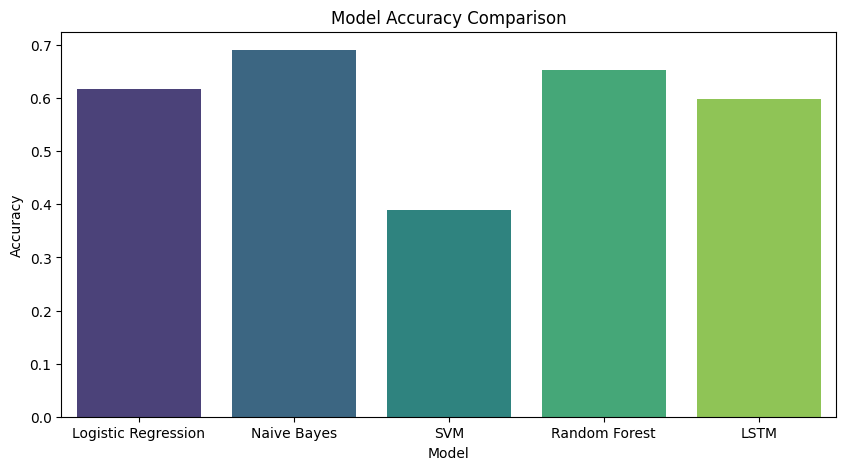

In [33]:
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Model", "Accuracy"])
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()

In [34]:
# Save models
joblib.dump(logreg, "logistic_regression.pkl")
joblib.dump(nb, "naive_bayes.pkl")
joblib.dump(svm, "svm.pkl")
joblib.dump(rf, "random_forest.pkl")
model.save("lstm_model.h5")

print("All models saved successfully!")

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate each model with Confusion Matrix & Classification Report
models = {
    "Logistic Regression": logreg,
    "Naive Bayes": nb,
    "SVM": svm,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"===== {name} =====")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, name)

# Evaluate LSTM separately
lstm_predictions = lstm_model.predict(X_test_seq)
lstm_final_predictions = lstm_predictions.argmax(axis=1)

print("===== LSTM =====")
print(classification_report(y_test_seq, lstm_final_predictions))
plot_confusion_matrix(y_test_seq, lstm_final_predictions, "LSTM")